#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
imdb_data = pd.read_csv('IMDB_Top250.csv')  # Replace with actual file path
douban_data = pd.read_csv('douban_top250.csv')  # Replace with actual file path

In [5]:
from bs4 import BeautifulSoup
import re
import urllib.request, urllib.error  # for URL requests
import csv  # for saving as CSV

In [6]:
# Regular expressions to extract information
findLink = re.compile(r'<a href="(.*?)">')  # detail link
findImgSrc = re.compile(r'<img.*src="(.*?)"', re.S)  # image link
findTitle = re.compile(r'<span class="title">(.*)</span>')  # movie title
findRating = re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')  # rating
findJudge = re.compile(r'<span>(\d*)人评价</span>')  # number of reviews
findInq = re.compile(r'<span class="inq">(.*)</span>')  # summary
findBd = re.compile(r'<p class="">(.*?)</p>', re.S)  # additional info

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
douban_file_path = 'douban_top250.csv'  
imdb_file_path = 'IMDB_Top250.csv'      

douban_data = pd.read_csv(douban_file_path, encoding='utf-8', on_bad_lines='skip')
imdb_data = pd.read_csv(imdb_file_path, encoding='utf-8', on_bad_lines='skip')

# Renaming columns for clarity and merging compatibility
douban_data.rename(columns={
    '影片中文名': 'Title',
    '评分': 'Douban_Score',
    '评价数': 'Douban_Reviews',
    '相关信息': 'Douban_Info'
}, inplace=True)

In [10]:
imdb_data.rename(columns={
    'Name': 'Title',
    'Year': 'Release_Year',
    'IMDB Ranking': 'IMDB_Score',
    'Genre': 'IMDB_Genre',
    'Director': 'IMDB_Director'
}, inplace=True)


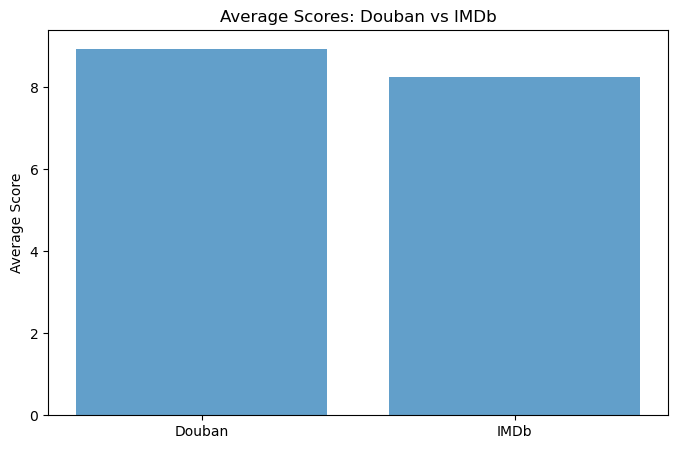

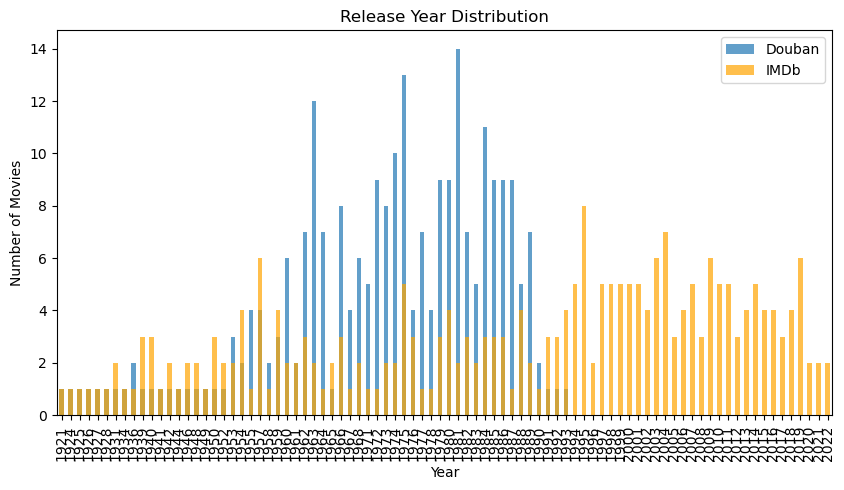

In [11]:
# Calculate average scores for both platforms
douban_avg_score = douban_data['Douban_Score'].mean()
imdb_avg_score = imdb_data['IMDB_Score'].mean()

# Find overlapping movies by title
overlap_movies = pd.merge(douban_data, imdb_data, on='Title')

# Visualize average scores
plt.figure(figsize=(8, 5))
plt.bar(['Douban', 'IMDb'], [douban_avg_score, imdb_avg_score], alpha=0.7)
plt.title('Average Scores: Douban vs IMDb')
plt.ylabel('Average Score')
plt.show()

# Analyze release year distribution
plt.figure(figsize=(10, 5))
douban_data['Douban_Info'] = douban_data['Douban_Info'].astype(str)
douban_years = douban_data['Douban_Info'].str.extract(r'(\d{4})').dropna()
douban_years = douban_years[0].astype(int).value_counts().sort_index()

imdb_years = imdb_data['Release_Year'].value_counts().sort_index()

douban_years.plot(kind='bar', alpha=0.7, label='Douban', figsize=(10, 5))
imdb_years.plot(kind='bar', alpha=0.7, label='IMDb', color='orange')
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

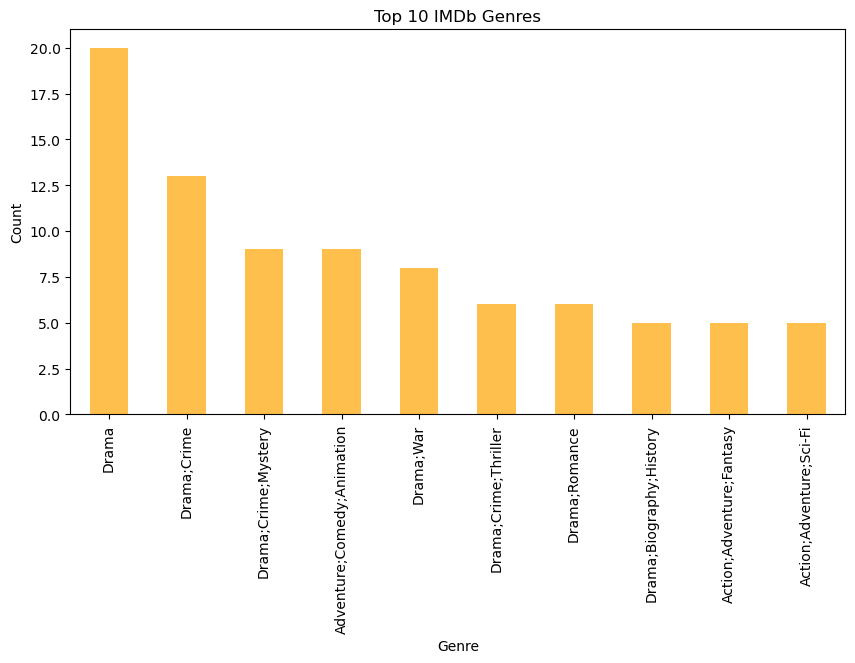

c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23467 (\N{CJK UNIFIED IDEOGRAPH-5BAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23822 (\N{CJK UNIFIED IDEOGRAPH-5D0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39567 (\N{CJK UNIFIED IDEOGRAPH-9A8F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from font(s) DejaVu Sans.
  fig.canvas

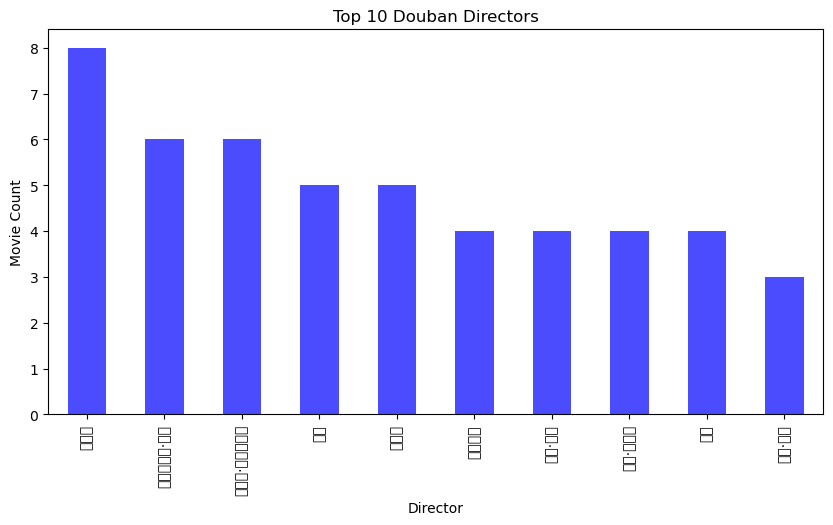

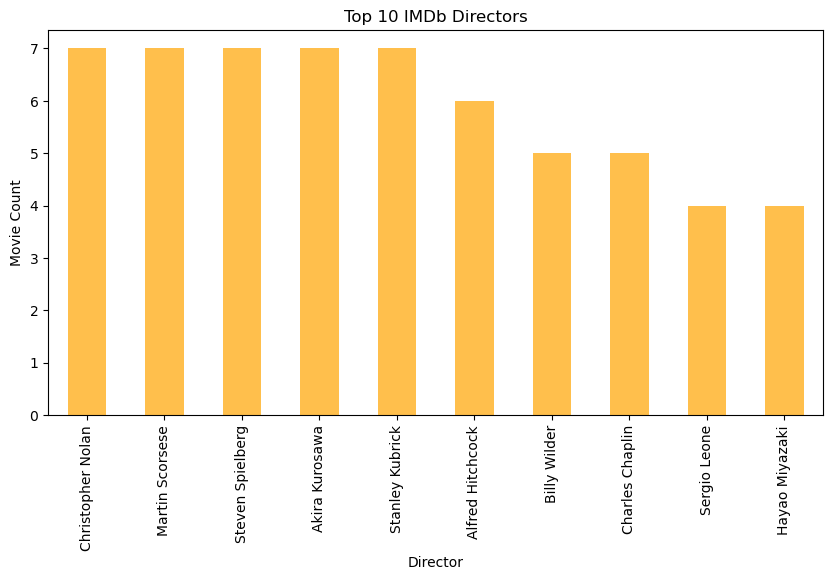

豆瓣平均评分: 8.9396
IMDb平均评分: 8.254
重叠电影数量: 0

In [12]:
# Analyze genre distribution
imdb_genres = imdb_data['IMDB_Genre'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 5))
imdb_genres.head(10).plot(kind='bar', alpha=0.7, color='orange')
plt.title('Top 10 IMDb Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Top directors by movie count
douban_directors = douban_data['Douban_Info'].str.extract(r'导演: (.+?) ').dropna()
douban_top_directors = douban_directors[0].value_counts().head(10)

imdb_top_directors = imdb_data['IMDB_Director'].value_counts().head(10)

plt.figure(figsize=(10, 5))
douban_top_directors.plot(kind='bar', alpha=0.7, label='Douban', color='blue')
plt.title('Top 10 Douban Directors')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.show()

plt.figure(figsize=(10, 5))
imdb_top_directors.plot(kind='bar', alpha=0.7, label='IMDb', color='orange')
plt.title('Top 10 IMDb Directors')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.show()

# Save overlapping movies to a CSV file
overlap_movies.to_csv('overlap_movies.csv', index=False)

# Print results
print(f"豆瓣平均评分: {douban_avg_score}")
print(f"IMDb平均评分: {imdb_avg_score}")
print(f"重叠电影数量: {len(overlap_movies)}")